In [1]:
# Logistic Regression from Scratch for Image Classification
## Car vs Bike Dataset


In [24]:
import os
import cv2
import numpy as np

IMG_SIZE = 64

data = []
labels = []

dataset_path = r"C:\Users\NANDINI\Downloads\transport"

for category in ["cars", "bike"]:
    folder_path = os.path.join(dataset_path, category)
    label = 0 if category == "cars" else 1
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)

X = np.array(data)
y = np.array(labels)


In [35]:
print("Total images loaded:", len(X))
print("Car images:", np.sum(y == 0))
print("Bike images:", np.sum(y == 1))


Total images loaded: 785
Car images: 420
Bike images: 365


In [25]:
X = X / 255.0
X = X.reshape(X.shape[0], -1)   # now 64×64 = 4096 features


In [26]:
from sklearn.model_selection import train_test_split

y_flat = y.flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X, y_flat, test_size=0.2, random_state=42
)

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

X_train = X_train.T
X_test = X_test.T


In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [28]:
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b


In [29]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    cost = -1/m * np.sum(Y*np.log(A + 1e-8) + (1-Y)*np.log(1-A + 1e-8))
    
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    return dw, db, cost


In [30]:
def train_model(X, Y, iterations, learning_rate):
    w, b = initialize_parameters(X.shape[0])
    costs = []
    
    for i in range(iterations):
        dw, db, cost = propagate(w, b, X, Y)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
    
    return w, b, costs


In [31]:
w, b, costs = train_model(
    X_train, y_train,
    iterations=5000,
    learning_rate=0.05
)


In [32]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)


In [33]:
train_pred = predict(w, b, X_train)
test_pred = predict(w, b, X_test)

train_accuracy = 100 - np.mean(np.abs(train_pred - y_train)) * 100
test_accuracy = 100 - np.mean(np.abs(test_pred - y_test)) * 100

print("Training Accuracy:", train_accuracy, "%")
print("Testing Accuracy:", test_accuracy, "%")


Training Accuracy: 100.0 %
Testing Accuracy: 62.42038216560509 %


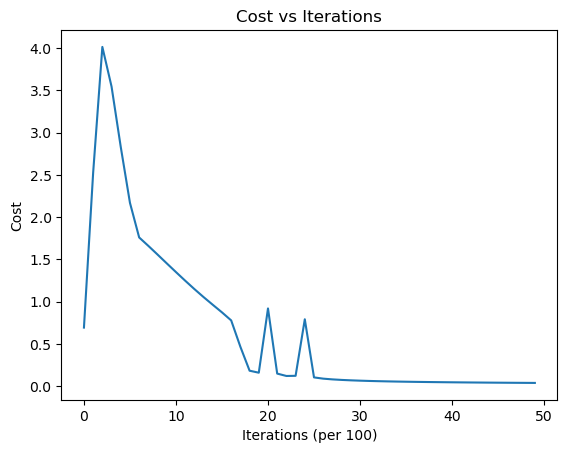

In [34]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel("Iterations (per 100)")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


In [ ]:
## Result
The Logistic Regression model successfully classified Car and Bike images.
The decreasing cost indicates proper convergence of the model.
